

# Project Title:- Famous paintings Analysis

# Data analyazed by: Aarya Sharma

# Problem Statement:
***The art market often lacks a clear understanding of relationships between artists, their artworks, and pricing. This project aims to analyze data from various sources to uncover trends in artwork production, pricing by canvas size, and the distribution of artworks across museums, facilitating better insights for collectors, curators, and art enthusiasts.***


# Installing necessary packages

In [1]:
!pip install mysql-connector-python
!pip install matplotlib
!pip install seaborn
!pip install pandas

## Import Libraries 

In [1]:
# Import required libraries
import mysql.connector  # For connecting to MySQL
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization

***Insight*** -
Installed all necessary packages

## Create a cursor object

In [4]:
import mysql.connector  # Import the MySQL connector module

connection = mysql.connector.connect(
    user='root',
    password='Aaryasharma27&',
    host='localhost',
    port=3306,
    database='famous_paintings1'
)

In [5]:
# Check if the connection is successful
if connection.is_connected():
    print("Connection to the database was successful!")

Connection to the database was successful!


***Insight***-
The code establishes a connection to a locally hosted MySQL database using the mysql.connector.connect method, 
allowing me to perform SQL operations in Python. Ensure to manage sensitive data securely and handle errors appropriately.

In [6]:
# Create a cursor object
cursor = connection.cursor()

In [7]:
# Check if the connection is successful
if connection.is_connected():
    print("Connection to the database was successful!")
    
    try:
        # Create a cursor object to interact with the database
        cursor = connection.cursor()
        print("Cursor object created successfully!")

        # Optionally, you can execute a simple query to verify that the cursor is working
        cursor.execute("SELECT DATABASE();")
        result = cursor.fetchone()
        print(f"Connected to database: {result[0]}")
        
    except mysql.connector.Error as err:
        print(f"Error creating cursor: {err}")


Connection to the database was successful!
Cursor object created successfully!
Connected to database: famous_paintings1


***Insight:-***
created a cursor to make a connection between SQL and jupyter notebook 

##   Function to retrieve data from MySQL and convert to pandas DataFrame

In [4]:
# Helper function to retrieve data from MySQL and convert to pandas DataFrame
def fetch_data(query, cursor):
    cursor.execute(query)
    return pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [11]:
import pandas as pd

# Helper function to retrieve data from MySQL and convert to pandas DataFrame
def fetch_data(query, cursor):
    try:
        # Execute the query
        cursor.execute(query)
        
        # Fetch all results
        results = cursor.fetchall()
        
        # Get column names from cursor.description
        column_names = [desc[0] for desc in cursor.description]
        
        # Convert results to a pandas DataFrame
        df = pd.DataFrame(results, columns=column_names)
        
        return df
    
    except mysql.connector.Error as err:
        print(f"Error fetching data: {err}")
        return None 

***Insights:-*** using a function to retrieve data from MySql and converting it into a dataframe***

## Fetch data from SQL tables

In [6]:
# Fetch data from the 'artist' table
artist_data = fetch_data("SELECT * FROM artist", cursor)
print(artist_data)

# Fetch data from the 'canvas_size' table
canvasize_data = fetch_data("SELECT * FROM canvas_size", cursor)
print (canvasize_data)

# Fetch data from the 'museum' table
museum_data = fetch_data("SELECT * FROM museum", cursor)
print(museum_data)
# Fetch data from the 'museum_house' table
museumhouse_data = fetch_data("SELECT * FROM museum_house", cursor)
print(museumhouse_data)
# Fetch data from the 'work' table
work_data = fetch_data("SELECT * FROM work", cursor)
print(work_data)
# Fetch data from the 'subject' table
subject_data = fetch_data("SELECT * FROM subject", cursor)
print(subject_data )
# Fetch data from the 'product_price' table
product_data = fetch_data("SELECT * FROM product_price", cursor)
print(product_data)

    artist_id                     full_name  first_name middle_names  \
0           1         Pierre-Auguste Renoir      Pierre      Auguste   
1           2         Lemuel Francis Abbott      Lemuel      Francis   
2           3           Eugène-Louis Boudin      Eugene        Louis   
3           4            Asher Brown Durand       Asher        Brown   
4           5          George Henry Laporte      George        Henry   
5           6           John Francis Rigaud        John      Francis   
6           7       John William Waterhouse        John      William   
7           8       Francis William Edmonds     Francis      William   
8           9           Frank Weston Benson      Benson        Frank   
9          10           Gustaf Wilhelm Palm      Gustaf      Wilhelm   
10         11          Edward William Cooke      Edward      William   
11         12         George Wesley Bellows      George       Wesley   
12         13           Alfred Henry Maurer      Alfred        H

***INSIGHTS:-*** Fetching the data from MySQL.

 ## Data Cleaning

####  Missing values

In [8]:
# Checking for missing values in artist_data
missing_values = artist_data.isnull().sum()
print("Missing values in artist_data:")
print(missing_values)

# Checking for missing values in canvasize_data
missing_values = canvasize_data.isnull().sum()
print("\nMissing values in canvasize_data:")
print(missing_values)

# Checking for missing values in museum_data
missing_values = museum_data.isnull().sum()
print("\nMissing values in museum_data:")
print(missing_values)

# Checking for missing values in museumhouse_data
missing_values = museumhouse_data.isnull().sum()
print("\nMissing values in museumhouse_data:")
print(missing_values)

# Checking for missing values in work_data
missing_values = work_data.isnull().sum()
print("\nMissing values in work_data:")
print(missing_values)

# Checking for missing values in subject_data
missing_values = subject_data.isnull().sum()
print("\nMissing values in subject_data:")
print(missing_values)

# Checking for missing values in product_data
missing_values = product_data.isnull().sum()
print("\nMissing values in product_data:")
print(missing_values)


Missing values in artist_data:
artist_id       0
full_name       0
first_name      0
middle_names    0
last_name       0
nationality     0
style           0
birth           0
death           0
dtype: int64

Missing values in canvasize_data:
size_id    0
width      0
height     0
label      0
dtype: int64

Missing values in museum_data:
museum_id    0
name         0
address      0
city         0
state        0
postal       0
country      0
phone        0
dtype: int64

Missing values in museumhouse_data:
museum_id    0
day          0
open         0
close        0
dtype: int64

Missing values in work_data:
work_id      0
name         0
artist_id    0
museum_id    0
dtype: int64

Missing values in subject_data:
work_id    0
subject    0
dtype: int64

Missing values in product_data:
work_id          0
size_id          0
sale_price       0
regular_price    0
dtype: int64


***Insights:-*** Checking if there is any missing values in the seven tables.

# Handling duplicate values

In [9]:
# Checking for duplicate rows in artist_data
duplicates = artist_data.duplicated().sum()
print("Duplicate rows in artist_data:", duplicates)

# Checking for duplicate rows in canvasize_data
duplicates = canvasize_data.duplicated().sum()
print("\nDuplicate rows in canvasize_data:", duplicates)

# Checking for duplicate rows in museum_data
duplicates = museum_data.duplicated().sum()
print("\nDuplicate rows in museum_data:", duplicates)

# Checking for duplicate rows in museumhouse_data
duplicates = museumhouse_data.duplicated().sum()
print("\nDuplicate rows in museumhouse_data:", duplicates)

# Checking for duplicate rows in work_data
duplicates = work_data.duplicated().sum()
print("\nDuplicate rows in work_data:", duplicates)

# Checking for duplicate rows in subject_data
duplicates = subject_data.duplicated().sum()
print("\nDuplicate rows in subject_data:", duplicates)

# Checking for duplicate rows in product_data
duplicates = product_data.duplicated().sum()
print("\nDuplicate rows in product_data:", duplicates)


Duplicate rows in artist_data: 0

Duplicate rows in canvasize_data: 0

Duplicate rows in museum_data: 0

Duplicate rows in museumhouse_data: 0

Duplicate rows in work_data: 0

Duplicate rows in subject_data: 0

Duplicate rows in product_data: 0


***Insights:-*** checking if there are any duplicate rows in the seven tables.

## Data View

In [11]:
# Display the first few rows of the Artist Data
print("Artist Data:")
print(artist_data.head())

# Display the first few rows of the Canvas Size Data
print("\nCanvas Size Data:")
print(canvasize_data.head())

# Display the first few rows of the Museum Data
print("\nMuseum Data:")
print(museum_data.head())

# Display the first few rows of the Museum House Data
print("\nMuseum House Data:")
print(museumhouse_data.head())

# Display the first few rows of the Work Data
print("\nWork Data:")
print(work_data.head())

# Display the first few rows of the Subject Data
print("\nSubject Data:")
print(subject_data.head())

# Display the first few rows of the Product Data
print("\nProduct Data:")
print(product_data.head())


Artist Data:
   artist_id              full_name first_name middle_names last_name  \
0          1  Pierre-Auguste Renoir     Pierre      Auguste    Renoir   
1          2  Lemuel Francis Abbott     Lemuel      Francis    Abbott   
2          3    Eugène-Louis Boudin     Eugene        Louis    Boudin   
3          4     Asher Brown Durand      Asher        Brown    Durand   
4          5   George Henry Laporte     George        Henry   Laporte   

  nationality                style  birth  death  
0      French        Impressionist   1841   1919  
1     English          Portraitist   1760   1803  
2      French        Impressionist   1824   1898  
3    American  Hudson River School   1796   1886  
4     English              Realist   1799   1873  

Canvas Size Data:
   size_id  width height                      label
0        1  15.00  22.00  15" x 22" (38 cm x 56 cm)
1        2  16.00  18.00  16" x 18" (41 cm x 46 cm)
2        3  16.00  20.00  16" x 20" (41 cm x 51 cm)
3        4  16.

***Insights:-***  Displaying the first few rows of the datasets.

# Printing the Shape of  Datasets

In [12]:
# Printing the shape of artist_data
print("Shape of artist_data:", artist_data.shape)

# Printing the shape of canvasize_data
print("Shape of canvasize_data:", canvasize_data.shape)

# Printing the shape of museum_data
print("Shape of museum_data:", museum_data.shape)

# Printing the shape of museumhouse_data
print("Shape of museumhouse_data:", museumhouse_data.shape)

# Printing the shape of work_data
print("Shape of work_data:", work_data.shape)

# Printing the shape of subject_data
print("Shape of subject_data:", subject_data.shape)

# Printing the shape of product_data
print("Shape of product_data:", product_data.shape)


Shape of artist_data: (50, 9)
Shape of canvasize_data: (50, 4)
Shape of museum_data: (33, 8)
Shape of museumhouse_data: (50, 4)
Shape of work_data: (51, 4)
Shape of subject_data: (50, 2)
Shape of product_data: (50, 4)


***Insights:-*** Printing the total rows and columns of the different tables in the SQL.

##  Descriptive Statistics for Multiple Data Tables

In [22]:

# Displaying descriptive statistics for artist_data
artist_description = artist_data.describe()
print("Descriptive statistics for artist_data:")
print(artist_description)

# Displaying descriptive statistics for canvasize_data
canvasize_description = canvasize_data.describe()
print("\nDescriptive statistics for canvasize_data:")
print(canvasize_description)

# Displaying descriptive statistics for museum_data
museum_description = museum_data.describe()
print("\nDescriptive statistics for museum_data:")
print(museum_description)

# Displaying descriptive statistics for museumhouse_data
museumhouse_description = museumhouse_data.describe()
print("\nDescriptive statistics for museumhouse_data:")
print(museumhouse_description)

# Displaying descriptive statistics for work_data
work_description = work_data.describe()
print("\nDescriptive statistics for work_data:")
print(work_description)

# Displaying descriptive statistics for subject_data
subject_description = subject_data.describe()
print("\nDescriptive statistics for subject_data:")
print(subject_description)

# Displaying descriptive statistics for product_data
product_description = product_data.describe()
print("\nDescriptive statistics for product_data:")
print(product_description)


Descriptive statistics for artist_data:
       artist_id        birth        death
count   50.00000    50.000000    50.000000
mean    25.50000  1795.980000  1863.420000
std     14.57738    74.669473    76.084832
min      1.00000  1544.000000  1589.000000
25%     13.25000  1768.000000  1825.250000
50%     25.50000  1811.000000  1886.500000
75%     37.75000  1848.750000  1915.750000
max     50.00000  1882.000000  1951.000000

Descriptive statistics for canvasize_data:
        size_id
count  50.00000
mean   25.50000
std    14.57738
min     1.00000
25%    13.25000
50%    25.50000
75%    37.75000
max    50.00000

Descriptive statistics for museum_data:
       museum_id
count   33.00000
mean    17.00000
std      9.66954
min      1.00000
25%      9.00000
50%     17.00000
75%     25.00000
max     33.00000

Descriptive statistics for museumhouse_data:
       museum_id                       open                      close
count  50.000000                         50                         50
mea

***Insights:-*** Fetching the descriptive statistics for all the tables in the schema.

 ## Data Visualization

C:\Users\dell\AppData\Local\Temp\ipykernel_8968\2900048685.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


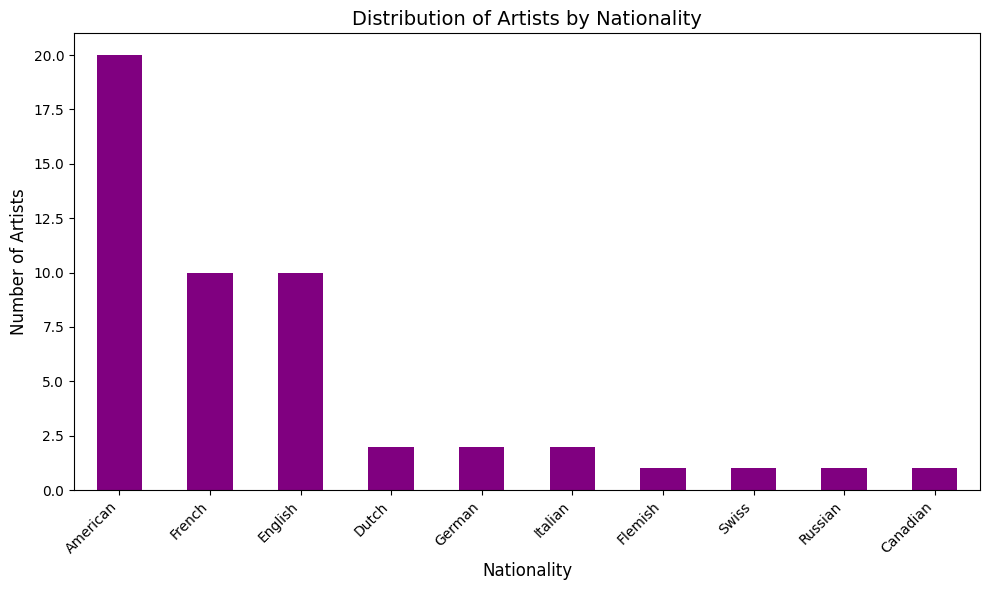

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Establish MySQL connection
connection = mysql.connector.connect(
    user='root',
    password='Aaryasharma27&',
    host='localhost',
    port=3306,
    database='famous_paintings1'
)

# Query to retrieve artist's full name and nationality
query = "SELECT full_name, nationality FROM artist"  # Adjust table/column names as needed

# Load data into Pandas DataFrame
data = pd.read_sql(query, connection)

# Check if the lengths of the two columns match (optional)
if len(data['full_name']) != len(data['nationality']):
    print("Error: The lists do not have the same length!")
else:
    # Count occurrences of each nationality
    nationality_count = data['nationality'].value_counts()

    # Create a bar chart
    plt.figure(figsize=(10,6))
    nationality_count.plot(kind='bar', color='purple')
    plt.title('Distribution of Artists by Nationality', fontsize=14)
    plt.xlabel('Nationality', fontsize=12)
    plt.ylabel('Number of Artists', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

***Insights:-*** Using a bar graph to know from which country the artists belong.

In [23]:
# Merge work_data and artist_data to analyze artworks by artists
artist_work_data = pd.merge(work_data, artist_data, on='artist_id', how='inner')
print("\nMerged Artist and Work Data:")
print(artist_work_data.head())


Merged Artist and Work Data:
   work_id                                               name  artist_id  \
0        1                Still Life with Flowers and a Watch          1   
1        2  Still Life with Fruit and a Beaker on a Cock's...          2   
2        3              Still Life with Fruit and a Goldfinch          3   
3        4                  Still Life with Fruit and Oysters          4   
4        5  Still Life with Fruit, Oysters, and a Porcelai...          5   

   museum_id              full_name first_name middle_names last_name  \
0          1  Pierre-Auguste Renoir     Pierre      Auguste    Renoir   
1          2  Lemuel Francis Abbott     Lemuel      Francis    Abbott   
2          3    Eugène-Louis Boudin     Eugene        Louis    Boudin   
3          4     Asher Brown Durand      Asher        Brown    Durand   
4          5   George Henry Laporte     George        Henry   Laporte   

  nationality                style  birth  death  
0      French        Im

***Insights:-*** Merging two tables artist and work to analyze artworks by artists in graphical form.

In [24]:
#  Count artworks by each artist
artwork_count_by_artist = artist_work_data.groupby('full_name')['work_id'].count().reset_index().rename(columns={'work_id': 'artwork_count'})
print("\nArtworks Count by Artist:")
print(artwork_count_by_artist)


Artworks Count by Artist:
                       full_name  artwork_count
0           Adriaen Thomasz. Key              1
1        Adélaïde Labille-Guiard              1
2            Alfred Henry Maurer              1
3        Alfred Thompson Bricher              1
4              Antoine-Jean Gros              1
5             Asher Brown Durand              1
6                      Canaletto              1
7         Caspar David Friedrich              1
8             Charles Caleb Ward              1
9         Charles Marion Russell              1
10            Charles Peale Polk              1
11        Charles Sprague Pearce              1
12     Constantin A. Westchiloff              1
13          Edward William Cooke              1
14           Eugène-Louis Boudin              1
15             Francis Luis Mora              1
16       Francis William Edmonds              1
17           Frank Weston Benson              1
18              Frans Jansz Post              1
19          G

**Insights:** This code shows each artist's name and the number of artworks they created.

In [26]:
#  Join work_data, productdata, and canvasize_data to analyze size and pricing information
artwork_size_price_data = pd.merge(pd.merge(work_data, product_data, on='work_id'), canvasize_data, on='size_id')
print("\nArtwork Size and Price Data:")
print(artwork_size_price_data.head())


Artwork Size and Price Data:
   work_id                                               name  artist_id  \
0        1                Still Life with Flowers and a Watch          1   
1        1                Still Life with Flowers and a Watch          1   
2        2  Still Life with Fruit and a Beaker on a Cock's...          2   
3        3              Still Life with Fruit and a Goldfinch          3   
4        4                  Still Life with Fruit and Oysters          4   

   museum_id  size_id sale_price regular_price  width height  \
0          1        1      85.00         85.00  15.00  22.00   
1          1       17     305.00        535.00  21.00  29.00   
2          2        2      95.00         95.00  16.00  18.00   
3          3        3      85.00         85.00  16.00  20.00   
4          4        4      95.00         95.00  16.00  23.00   

                       label  
0  15" x 22" (38 cm x 56 cm)  
1  21" x 29" (53 cm x 74 cm)  
2  16" x 18" (41 cm x 46 cm)  
3  1

***Insights:-***The code joins the work_data, product_data, and canvasize_data DataFrames to combine information about each artwork's 
                 size and pricing, based on common columns and prints the first few rows of the resulting merged dataset.

# Average Sale and Regular Price by Canvas Size

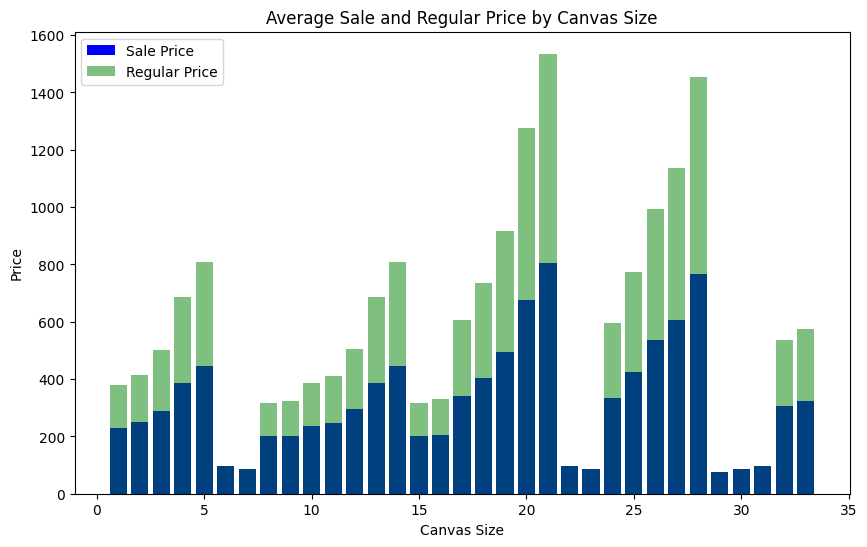

In [45]:
# Visualization: Average sale and regular price by canvas size
ple('Average Sale and Regular Price by Canvas Size')
plt.legend()
plt.show()lt.figure(figsize=(10, 6))
plt.bar(average_price_by_size['size_id'], average_price_by_size['sale_price'], color='blue', label='Sale Price')
plt.bar(average_price_by_size['size_id'], average_price_by_size['regular_price'], color='green', label='Regular Price', alpha=0.5)
plt.xlabel('Canvas Size')
plt.ylabel('Price')
plt.tit

## Insights:
This bar chart shows the canvas size and prices of different sizes of canvas with various prices that are different from sales prices and regular prices.
Larger canvas sizes (Size IDs 20, 21, 28) tend to command higher prices, suggesting a premium for larger artworks.
Some smaller canvas sizes (e.g., Size IDs 6, 7, 22) are priced consistently low, likely indicating mass production or lower market value.
There is a noticeable trend where sale prices are generally lower than regular prices, which reflects typical discount patterns for artworks.

Here is the chart visualizing the Average Sale Price and Average Regular Price by canvas size (size_id).
The blue bars represent the sale prices, while the green bars indicate the regular prices.

# Numbers Of Artworks Per Museum

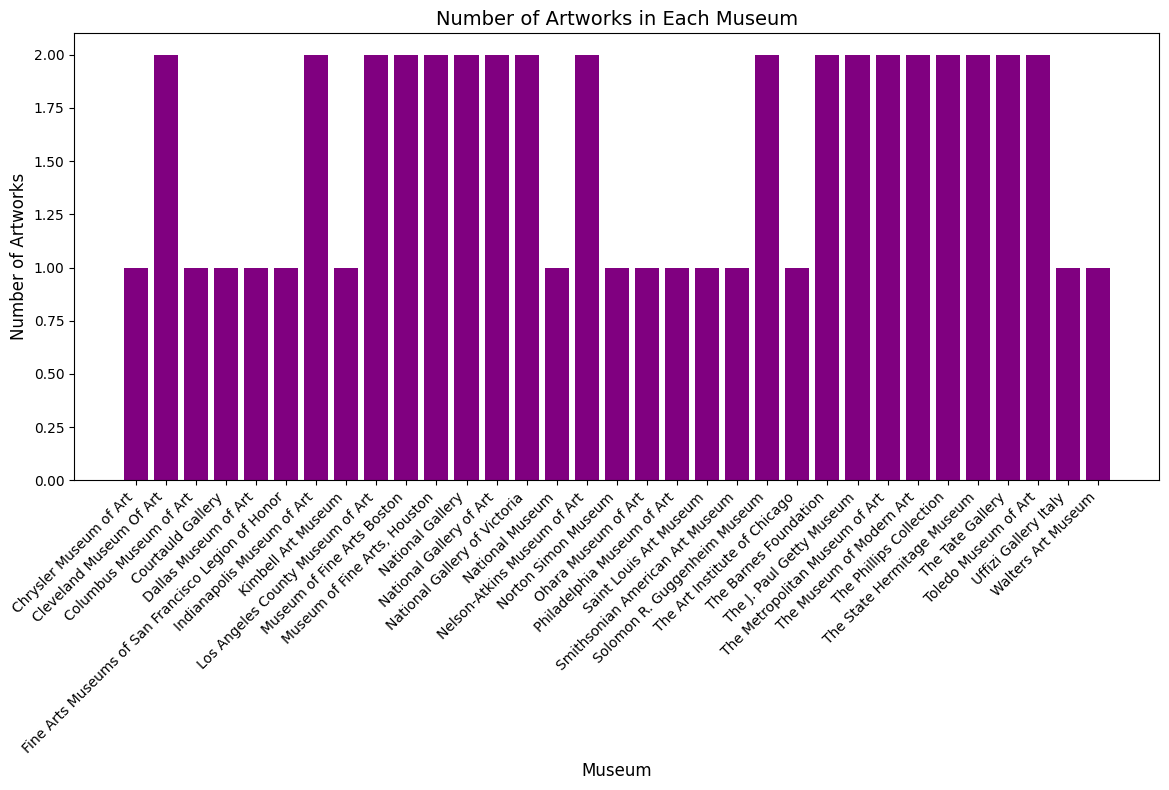

In [36]:
# Visualization: Number of artworks per museum
plt.figure(figsize=(12, 8))  # Increase the figure size for better visibility
plt.bar(museum_artwork_count['name_y'], museum_artwork_count['artwork_count'], color='purple')

plt.xlabel('Museum', fontsize=12)
plt.ylabel('Number of Artworks', fontsize=12)
plt.title('Number of Artworks in Each Museum', fontsize=14)

# Rotate x-tick labels for better readability and adjust size
plt.xticks(rotation=45, ha='right', fontsize=10)

# Limit the number of x-ticks displayed
plt.xticks(ticks=range(len(museum_artwork_count)), labels=museum_artwork_count['name_y'], rotation=45)

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()




## Insights:
***Museums such as the Cleveland Museum Of Art, Indianapolis Museum of Art, and Museum of Fine Arts, Boston showcase a more extensive collection, each housing 2 artworks, indicating a diverse range of works from different artists.***

***The majority of museums have around 1-2 artworks.***

***This bar chart shows number of artworks as per different museums.***

# Number of Artworks by Subject

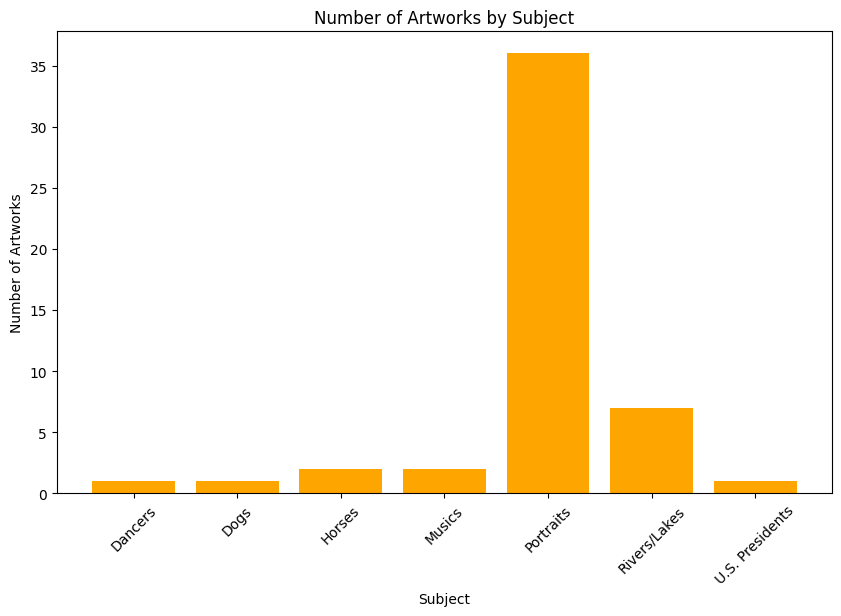

In [38]:
# Visualization: Artworks by subject
plt.figure(figsize=(10, 6))
plt.bar(subject_artwork_count['subject'], subject_artwork_count['artwork_count'], color='orange')
plt.xlabel('Subject')
plt.ylabel('Number of Artworks')
plt.title('Number of Artworks by Subject')
plt.xticks(rotation=45)
plt.show()



## Insights:
***This bar chart shows basically how many arts is present by subject like dancers,dogs etc
Portraits are the most common subject, with 36 artworks, indicating a strong interest or focus on this theme among artists.
Rivers/Lakes have a moderate representation with 7 artworks, showing some diversity in subject matter.
 Other subjects like Horses and Musics each have 2 artworks, while subjects like Dancers, Dogs, and U.S. Presidents are less represented with only 1 artwork each.***


# Top 10 Artists by Number of Works

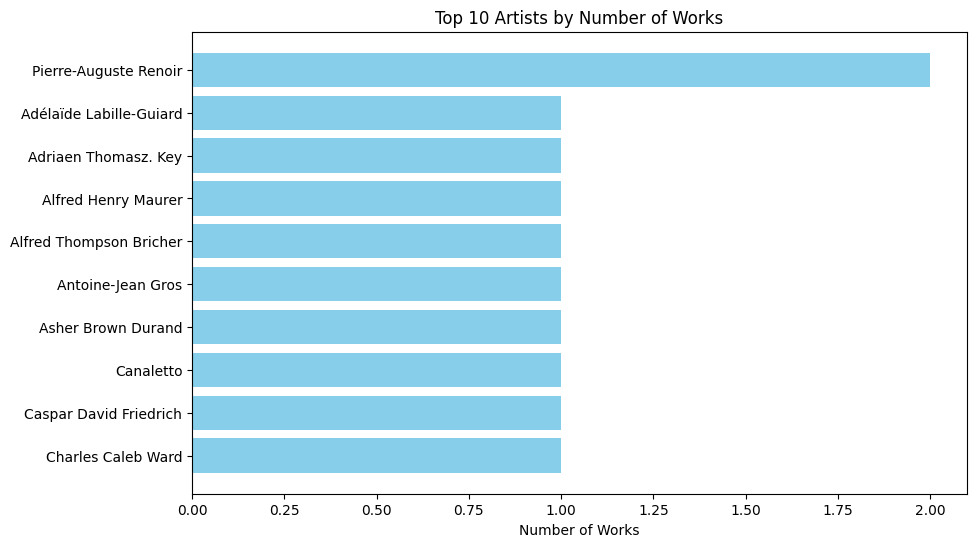

In [43]:
# Query execution for top artists
artist_query = """
SELECT a.full_name, COUNT(w.work_id) AS work_count
FROM artist a
JOIN work w ON a.artist_id = w.artist_id
GROUP BY a.full_name
ORDER BY work_count DESC
LIMIT 10;
"""
top_artists = fetch_data(artist_query, cursor)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_artists['full_name'], top_artists['work_count'], color='skyblue')
plt.xlabel('Number of Works')
plt.title('Top 10 Artists by Number of Works')
plt.gca().invert_yaxis()
plt.show()


#### Insights:
***The query uses a JOIN between the artist table (as a) and the work table (as w), linking them via the artist_id column. This allows to count the number of works (work_id) associated with each artist.***

***this bar plot shows top 10 artists and their number of work in which pierre auguste renoirtops the chart.***


# Distribution of Museums by City

             city  museum_count
0        New York             3
1       Melbourne             1
2     Kansas City             2
3          Boston             1
4      Washington             3
5          London             2
6    Philadelphia             2
7       Cleveland             1
8         Houston             1
9     Los Angeles             2
10         Toledo             1
11   Indianapolis             1
12  San Francisco             1
13        Chicago             1
14       St Louis             1
15        Firenze             1
16      Kurashiki             1
17      Baltimore             1
18        Cardiff             1
19       Columbus             1
20     Fort Worth             1
21         Dallas             1
22        Norfolk             1
23       Pasadena             1
24          Stran             1


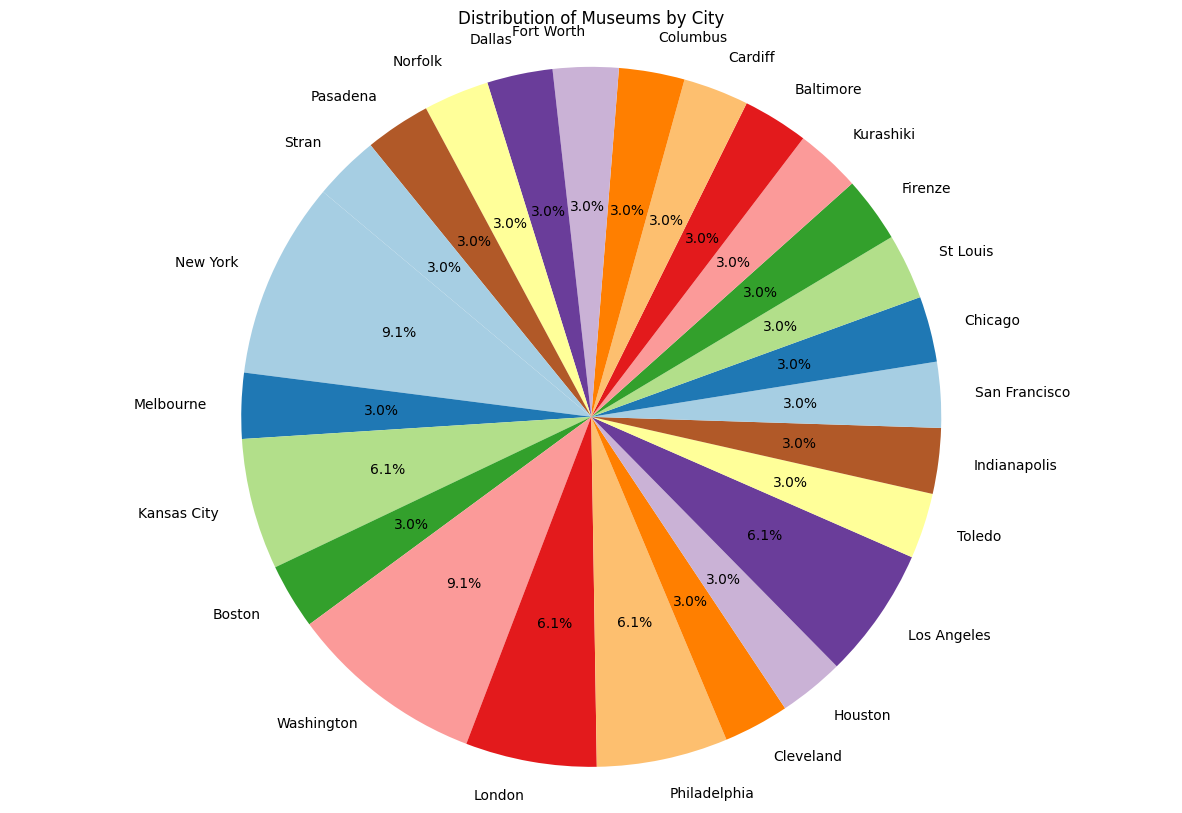

In [17]:
# Query execution for museum locations
location_query = """
SELECT city, COUNT(museum_id) AS museum_count
FROM museum
GROUP BY city;
"""
museum_locations = fetch_data(location_query, cursor)
print(museum_locations)

# Plotting Pie Chart
plt.figure(figsize=(15, 10))
plt.pie(museum_locations['museum_count'], labels=museum_locations['city'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Museums by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Insights:-
***This code executes a SQL query to fetch the number of museums in each city and then visualizes the distribution of museums across cities using a pie chart***

***New York and Washington each have the highest number of museums, with 3 museums each, indicating a rich cultural presence in these cities.
Cities like Kansas City, Los Angeles, and London follow with 2 museums, suggesting these locations also have a significant number of art institutions.***

***The pie chart shows that while some cities have multiple museums, many cities have only one. This reflects a diverse distribution of museums across various locations, with each city contributing to the overall cultural landscape.***


# Conclusion

***This project provides a structured analysis of famous paintings across various dimensions such as artist contributions, museum representation, artwork pricing, and subjects. The visualizations and insights will be helpful for art collectors, gallery owners, and museum curators to make informed decisions about acquisitions, exhibitions, and pricing strategies. The presentation will summarize these findings and provide a clear understanding of the art world dynamics.***